In [0]:
from google.colab import drive
drive.mount('/content/drive')



Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!unzip -uq "/content/drive/My Drive/CovidDataset1.zip" -d "/content/data"

In [0]:
TRAIN_PATH = "/content/data/CovidDataset/Train"
VAL_PATH = "/content/data/CovidDataset/Val"

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import * 
from keras.preprocessing import image

Using TensorFlow backend.


In [0]:
# CNN Based Model in Keras

model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 110, 110, 64)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 54, 54, 64)       

In [0]:
# Train from scratch
train_datagen = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)

test_dataset = image.ImageDataGenerator(rescale=1./255)

In [0]:
train_generator = train_datagen.flow_from_directory(
    '/content/data/CovidDataset/Train',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')


Found 673 images belonging to 2 classes.


In [0]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [0]:
validation_generator = test_dataset.flow_from_directory(
    '/content/data/CovidDataset/Val',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')

Found 158 images belonging to 2 classes.


In [0]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=10,
    epochs = 15,
    validation_data = validation_generator,
    validation_steps=2
)

Epoch 1/15
10/10 [==============================] - 114s 11s/step - loss: 1.1713 - accuracy: 0.5094 - val_loss: 0.6910 - val_accuracy: 0.8281
Epoch 2/15
10/10 [==============================] - 79s 8s/step - loss: 0.6907 - accuracy: 0.6367 - val_loss: 0.6997 - val_accuracy: 0.4688
Epoch 3/15
10/10 [==============================] - 106s 11s/step - loss: 0.6715 - accuracy: 0.5656 - val_loss: 0.6908 - val_accuracy: 0.4194
Epoch 4/15
10/10 [==============================] - 84s 8s/step - loss: 0.6058 - accuracy: 0.6194 - val_loss: 0.6380 - val_accuracy: 0.5156
Epoch 5/15
10/10 [==============================] - 108s 11s/step - loss: 0.5323 - accuracy: 0.7375 - val_loss: 0.5353 - val_accuracy: 0.7097
Epoch 6/15
10/10 [==============================] - 93s 9s/step - loss: 0.4803 - accuracy: 0.7781 - val_loss: 0.4892 - val_accuracy: 0.7969
Epoch 7/15
10/10 [==============================] - 93s 9s/step - loss: 0.3762 - accuracy: 0.8270 - val_loss: 0.4763 - val_accuracy: 0.7344
Epoch 8/15
10/

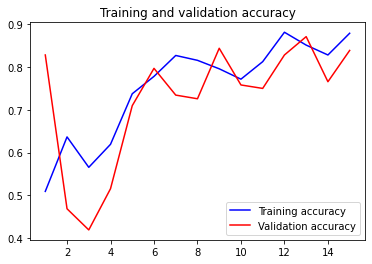

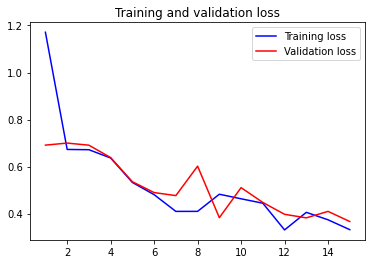

In [0]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)

plt.figure()
plt.plot(epochs, acc, 'b', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
#plt.savefig('Accuracy_Augmented.jpg')

plt.figure()
plt.plot(epochs, loss, 'b', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
#plt.savefig('Loss_Augmented.jpg')


In [0]:
steps_per_epoch =10
val_steps_per_epoch=2

final_loss, final_accuracy = model.evaluate(validation_generator, steps = val_steps_per_epoch)
print("Final loss: {:.2f}".format(final_loss))
print("Final accuracy: {:.2f}%".format(final_accuracy * 100))

2/2 [==============================] - 7s 4s/step
Final loss: 0.39
Final accuracy: 79.69%


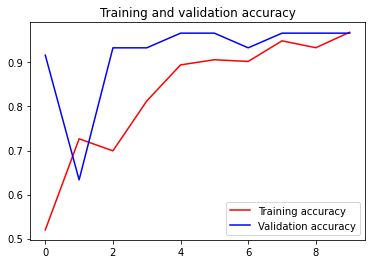

<Figure size 432x288 with 0 Axes>

In [0]:
import matplotlib.pyplot as plt
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [0]:
model.save('dcv.h5')
from google.colab import files
files.download("dcv.h5")


In [0]:
import tensorflow as tf

model = tf.keras.models.load_model('dcv.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
open("dcv.tflite", "wb").write(tflite_model)

22675532

 **TRANSFER LEARNING VGG16**

In [0]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
IMAGE_SIZE = [224, 224]

train_path = '/content/data/CovidDataset/Train'
valid_path = '/content/data/CovidDataset/Val'

# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False
  

  
  # useful for getting number of classes
folders = glob('/content/data/CovidDataset/Train/*')
  

# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model.summary()

# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/content/data/CovidDataset/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('/content/data/CovidDataset/Val',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

58892288/58889256 [==============================] - 5s 0us/step
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
____________________________________________________________

In [0]:
# fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/5
22/22 [==============================] - 455s 21s/step - loss: 0.5873 - accuracy: 0.7578 - val_loss: 1.0590 - val_accuracy: 0.6899
Epoch 2/5
22/22 [==============================] - 438s 20s/step - loss: 0.4702 - accuracy: 0.8648 - val_loss: 0.3420 - val_accuracy: 0.8038
Epoch 3/5
22/22 [==============================] - 440s 20s/step - loss: 0.3882 - accuracy: 0.8722 - val_loss: 0.9819 - val_accuracy: 0.8165
Epoch 4/5
22/22 [==============================] - 439s 20s/step - loss: 0.2288 - accuracy: 0.9034 - val_loss: 0.5136 - val_accuracy: 0.8418
Epoch 5/5
22/22 [==============================] - 439s 20s/step - loss: 0.2144 - accuracy: 0.9108 - val_loss: 0.6514 - val_accuracy: 0.8165


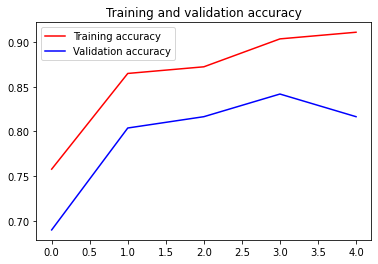

<Figure size 432x288 with 0 Axes>

In [0]:
import matplotlib.pyplot as plt
acc = r.history['accuracy']
val_acc = r.history['val_accuracy']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [0]:
model.save('TRANSFER1.h5')

In [0]:
from keras.models import load_model
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np
model = load_model('TRANSFER1.h5')
img = image.load_img('/content/data/CovidDataset/Train/Covid/23E99E2E-447C-46E5-8EB2-D35D12473C39.png', target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
img_data = preprocess_input(x)
classes = model.predict(img_data)
print(classes)

[[1.0000000e+00 2.5193913e-18]]


In [0]:
import tensorflow as tf

model = tf.keras.models.load_model('TRANSFER1.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
open("TRANSFER1.tflite", "wb").write(tflite_model)

59065244

In [0]:
!unzip -uq "/content/drive/My Drive/HACK.zip" -d "/content"

In [0]:
IMAGE_SIZE = [224, 224]

train_path = '/content/HACK/TRAIN'
valid_path = '/content/HACK/VAL'

# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False
  

  
  # useful for getting number of classes
folders = glob('/content/data/CovidDataset/Train/*')
  

# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model.summary()

# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/content/HACK/TRAIN',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('/content/HACK/VAL',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [0]:
r1 = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/5
25/25 [==============================] - 494s 20s/step - loss: 0.4143 - accuracy: 0.8435 - val_loss: 0.0064 - val_accuracy: 1.0000
Epoch 2/5
25/25 [==============================] - 478s 19s/step - loss: 0.0391 - accuracy: 0.9885 - val_loss: 0.0123 - val_accuracy: 1.0000
Epoch 3/5
25/25 [==============================] - 476s 19s/step - loss: 0.0494 - accuracy: 0.9796 - val_loss: 0.0457 - val_accuracy: 0.9910
Epoch 4/5
25/25 [==============================] - 478s 19s/step - loss: 0.0379 - accuracy: 0.9873 - val_loss: 0.0028 - val_accuracy: 0.9910
Epoch 5/5
25/25 [==============================] - 476s 19s/step - loss: 0.0213 - accuracy: 0.9962 - val_loss: 0.0303 - val_accuracy: 1.0000


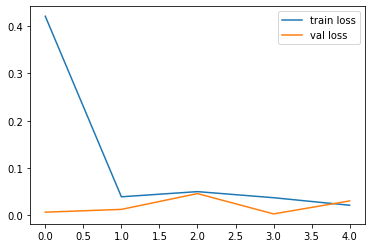

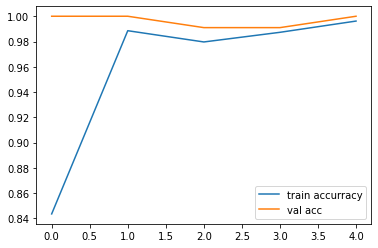

<Figure size 432x288 with 0 Axes>

In [0]:
plt.plot(r1.history['loss'], label='train loss')
plt.plot(r1.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# accuracies
plt.plot(r1.history['accuracy'], label='train accurracy')
plt.plot(r1.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [0]:
model.save('Transfer2.h5')
from keras.models import load_model
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np
model = load_model('Transfer2.h5')
img = image.load_img('/content/HACK/TRAIN/COVID/1-s2.0-S0929664620300449-gr2_lrg-b.jpg', target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
img_data = preprocess_input(x)
classes = model.predict(img_data)
print(classes)

[[1.0000000e+00 1.3322121e-18]]


In [0]:
import tensorflow as tf

model = tf.keras.models.load_model('Transfer2.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
open("Transfer2.tflite", "wb").write(tflite_model)

59065244

In [0]:
from keras.applications.resnet50 import ResNet50

In [0]:
IMAGE_SIZE = [224, 224]

train_path = '/content/HACK/TRAIN'
valid_path = '/content/HACK/VAL'

# add preprocessing layer to the front of VGG
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in resnet.layers:
  layer.trainable = False
  

  
  # useful for getting number of classes
folders = glob('/content/data/CovidDataset/Train/*')
  

# our layers - you can add more if you want
x = Flatten()(resnet.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model1 = Model(inputs=resnet.input, outputs=prediction)

# view the structure of the model
model1.summary()

# tell the model what cost and optimization method to use
model1.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/content/HACK/TRAIN',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('/content/HACK/VAL',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


94658560/94653016 [==============================] - 7s 0us/step
Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
___________________________

In [0]:
r2 = model1.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/5
25/25 [==============================] - 210s 8s/step - loss: 1.2550 - accuracy: 0.9135 - val_loss: 11.0339 - val_accuracy: 0.4955
Epoch 2/5
25/25 [==============================] - 195s 8s/step - loss: 0.2156 - accuracy: 0.9835 - val_loss: 24.9240 - val_accuracy: 0.4955
Epoch 3/5
25/25 [==============================] - 194s 8s/step - loss: 0.0892 - accuracy: 0.9949 - val_loss: 15.8896 - val_accuracy: 0.4955
Epoch 4/5
25/25 [==============================] - 194s 8s/step - loss: 0.0864 - accuracy: 0.9962 - val_loss: 13.1222 - val_accuracy: 0.4955
Epoch 5/5
25/25 [==============================] - 194s 8s/step - loss: 0.0307 - accuracy: 0.9949 - val_loss: 17.1170 - val_accuracy: 0.4955
